In [3]:
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
import pandas as pd
import matplotlib.pyplot as plt
from dataset import *
from evaluation import *
from train import *
from models import *

from transformers import logging
logging.set_verbosity_error()
import warnings
warnings.filterwarnings('ignore')

## 一. Data inspection: 检查distribution

<AxesSubplot:xlabel='label'>

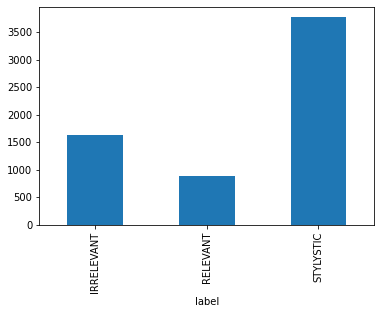

In [10]:
datapath = '../generated_data/similar_sentences.xlsx'
df = pd.read_excel(datapath)
df.groupby(['label']).size().plot.bar()

## 二. bert tokenizer demo

In [3]:
from transformers import BertTokenizer
from transformers import RobertaTokenizer
#tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text, example_text ,padding='max_length', max_length = 20, 
                       truncation=True, return_tensors="pt")

In [6]:
example_text = tokenizer.decode(bert_input.input_ids[0])
example_text

'[CLS] i will watch memento tonight [SEP] i will watch memento tonight [SEP] [PAD] [PAD] [PAD] [PAD] [PAD]'

## 三. Data set: 数据集

In [2]:
train_dataloader, val_dataloader, test_dataloader = get_dataloader(df)

train: 5032 val: 629 test: 629


## 四. Model: 模型

In [4]:
# Load the model
model = BertClassifier()

## 五. Training: 训练

In [5]:
EPOCHS = 1
LR = 1e-6
              
train(model, train_dataloader, val_dataloader, LR, EPOCHS)

# Save the model
torch.save(model.state_dict(), 'models/bert_model_{}.pt'.format(EPOCHS))

100%|██████████| 315/315 [01:50<00:00,  2.84it/s]


Epochs: 1 | Train Loss:  0.810                 | Train Accuracy:  9.898                 | Val Loss:  0.661                 | Val Accuracy:  10.725


## 六. Evaluation: 测试

In [8]:
# Load the model
model = BertClassifier()
model.load_state_dict(torch.load('models/bert_model_1.pt'))
evaluate(model, test_dataloader)

Test Accuracy:  0.674
Test F1:  0.446
Test Precision:  0.486
Test Recall:  0.502
